In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/content/Cars Datasets 2025.csv",encoding = "latin1")

In [3]:
df['Cars Prices'] = df['Cars Prices'].astype(str)
df['Cars Prices'] = df['Cars Prices'].str.replace(r'[\$,]', '', regex=True)
df['Cars Prices'] = df['Cars Prices'].str.split('-').str[0]   # take first if range given
df['Cars Prices'] = pd.to_numeric(df['Cars Prices'], errors='coerce')

In [4]:
df['HorsePower'] = df['HorsePower'].astype(str).str.replace('hp','').str.split('-').str[0]
df['HorsePower'] = pd.to_numeric(df['HorsePower'], errors='coerce')

In [5]:
hp_mean = df['HorsePower'].mean()
df['HorsePower'] = df['HorsePower'].fillna(hp_mean)

In [6]:
df['Total Speed'] = df['Total Speed'].str.replace('km/h', '', regex=False)
df['Total Speed'] = pd.to_numeric(df['Total Speed'], errors='coerce')

In [7]:
df

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963.000000,340.0,2.5 sec,1100000.0,plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.000000,250.0,5.3 sec,460000.0,Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70.000000,165.0,10.5 sec,12000.0,Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630.000000,250.0,3.2 sec,161000.0,Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602.000000,320.0,3.6 sec,253290.0,Petrol,2,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240.000000,180.0,7.6 sec,NaN,Hybrid (Gas + Electric),5,239 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326.000000,180.0,6.8 sec,50000.0,Hybrid,7,630 Nm
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,305.005831,190.0,8.0  9.2 sec,NaN,Gas / Hybrid,5,190  210 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,305.005831,180.0,7.9  10.5 sec,NaN,Hybrid,5,190  205 Nm


In [8]:
df['Torque'] = df['Torque'].str.replace('Nm', '', regex=False)
df['Torque'] = df['Torque'].str.split('-').str[0]
df['Torque'] = pd.to_numeric(df['Torque'], errors='coerce')

In [9]:
df

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963.000000,340.0,2.5 sec,1100000.0,plug in hyrbrid,2,800.0
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.000000,250.0,5.3 sec,460000.0,Petrol,5,900.0
2,Ford,KA+,1.2L Petrol,"1,200 cc",70.000000,165.0,10.5 sec,12000.0,Petrol,5,100.0
3,MERCEDES,GT 63 S,V8,"3,982 cc",630.000000,250.0,3.2 sec,161000.0,Petrol,4,900.0
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602.000000,320.0,3.6 sec,253290.0,Petrol,2,560.0
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240.000000,180.0,7.6 sec,NaN,Hybrid (Gas + Electric),5,239.0
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326.000000,180.0,6.8 sec,50000.0,Hybrid,7,630.0
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,305.005831,190.0,8.0  9.2 sec,NaN,Gas / Hybrid,5,NaN
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,305.005831,180.0,7.9  10.5 sec,NaN,Hybrid,5,NaN


In [10]:
Torque_mean = df['Torque'].mean()
df['Torque'] = df['Torque'].fillna(Torque_mean)

In [11]:
df

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963.000000,340.0,2.5 sec,1100000.0,plug in hyrbrid,2,800.000000
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.000000,250.0,5.3 sec,460000.0,Petrol,5,900.000000
2,Ford,KA+,1.2L Petrol,"1,200 cc",70.000000,165.0,10.5 sec,12000.0,Petrol,5,100.000000
3,MERCEDES,GT 63 S,V8,"3,982 cc",630.000000,250.0,3.2 sec,161000.0,Petrol,4,900.000000
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602.000000,320.0,3.6 sec,253290.0,Petrol,2,560.000000
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240.000000,180.0,7.6 sec,NaN,Hybrid (Gas + Electric),5,239.000000
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326.000000,180.0,6.8 sec,50000.0,Hybrid,7,630.000000
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,305.005831,190.0,8.0  9.2 sec,NaN,Gas / Hybrid,5,430.979044
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,305.005831,180.0,7.9  10.5 sec,NaN,Hybrid,5,430.979044


In [12]:
df['Seats'] = pd.to_numeric(df['Seats'], errors='coerce')

In [13]:
df = df.fillna(df.median(numeric_only=True))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1218 non-null   object 
 1   Cars Names                 1218 non-null   object 
 2   Engines                    1218 non-null   object 
 3   CC/Battery Capacity        1215 non-null   object 
 4   HorsePower                 1218 non-null   float64
 5   Total Speed                1218 non-null   float64
 6   Performance(0 - 100 )KM/H  1212 non-null   object 
 7   Cars Prices                1218 non-null   float64
 8   Fuel Types                 1218 non-null   object 
 9   Seats                      1218 non-null   float64
 10  Torque                     1218 non-null   float64
dtypes: float64(5), object(6)
memory usage: 104.8+ KB


EDA (Exploratory Data Analysis)


In [15]:
#---Companies with most cars
print("\nTop Companies by number of cars:")
print(df['Company Names'].value_counts().head(10))


Top Companies by number of cars:
Company Names
Nissan        149
Volkswagen    109
Porsche        96
Mazda          87
Mitsubishi     60
GMC            59
Chevrolet      58
Peugeot        54
Kia            54
Ford           54
Name: count, dtype: int64


In [16]:
# -- Average car price by fuel type
print("\nAverage Price by Fuel Type:")
print(df.groupby('Fuel Types')['Cars Prices'].mean())


Average Price by Fuel Type:
Fuel Types
CNG/Petrol                 1.180000e+04
Diesel                     4.198222e+04
Diesel Hybrid              5.000000e+04
Diesel/Petrol              2.025000e+04
Electric                   6.787067e+04
Gas / Hybrid               4.200000e+04
Hybrid                     1.545944e+05
Hybrid (Gas + Electric)    4.200000e+04
Hybrid (Petrol)            1.487500e+05
Hybrid / Plug-in           4.200000e+04
Hybrid/Electric            1.800000e+04
Hybrid/Petrol              2.200000e+04
Hydrogen                   4.663333e+04
Petrol                     1.602375e+05
Petrol (Hybrid)            4.200000e+04
Petrol, Diesel             3.866667e+04
Petrol, Hybrid             3.925250e+04
Petrol/AWD                 3.450000e+04
Petrol/Diesel              3.544375e+04
Petrol/EV                  2.050000e+04
Petrol/Hybrid              2.738750e+04
Plug-in Hybrid             4.482000e+04
plug in hyrbrid            1.100000e+06
Name: Cars Prices, dtype: float64


In [17]:
# 5.3 - Fastest car
fastest = df.loc[df['Total Speed'].idxmax()]
print("\nFastest Car:", fastest['Cars Names'], "from", fastest['Company Names'], "with speed", fastest['Total Speed'], "km/h")


Fastest Car: Bolide from Bugatti with speed 500.0 km/h


**Data Visualization**


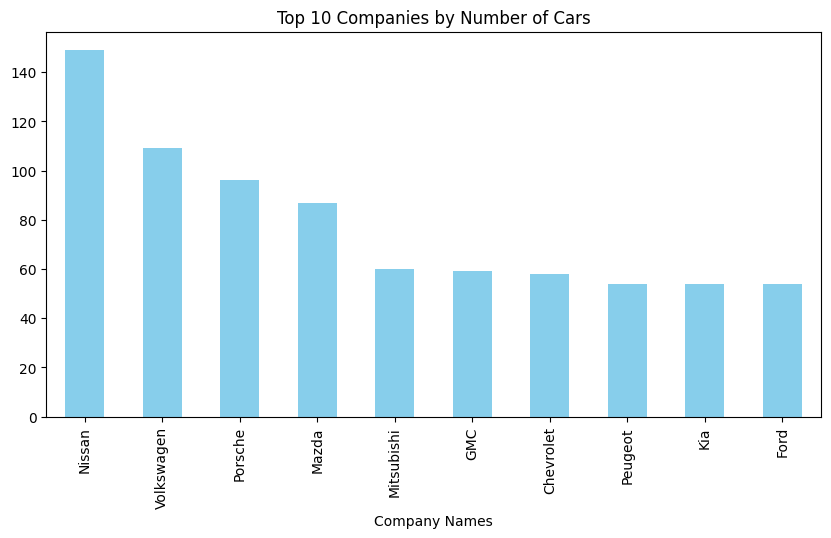

In [18]:
plt.figure(figsize=(10,5))
df['Company Names'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Companies by Number of Cars")
plt.show()

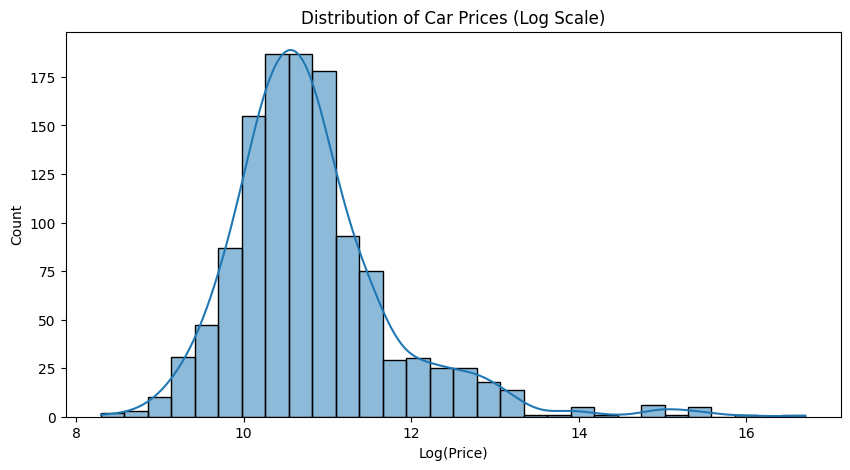

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df['Cars Prices'].dropna()), bins=30, kde=True)
plt.title("Distribution of Car Prices (Log Scale)")
plt.xlabel("Log(Price)")
plt.ylabel("Count")
plt.show()

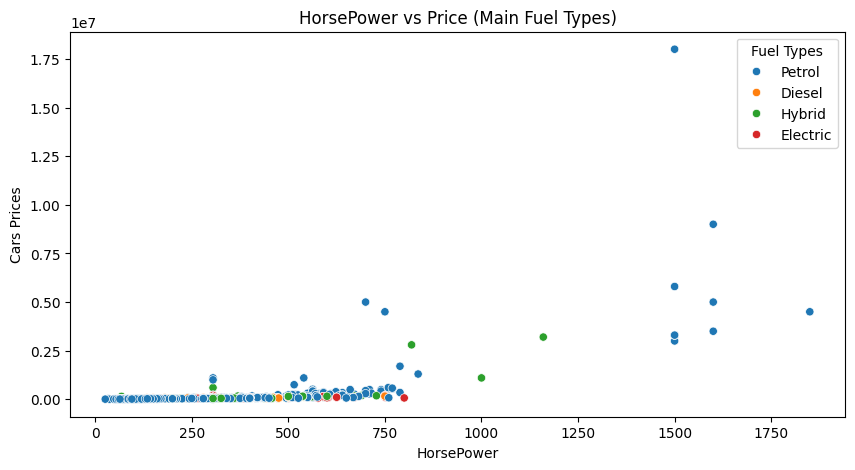

In [20]:
main_fuels = ['Petrol', 'Diesel', 'Electric', 'Hybrid']
df_main = df[df['Fuel Types'].isin(main_fuels)]

plt.figure(figsize=(10,5))
sns.scatterplot(x='HorsePower', y='Cars Prices', hue='Fuel Types', data=df_main)
plt.title("HorsePower vs Price (Main Fuel Types)")
plt.show()

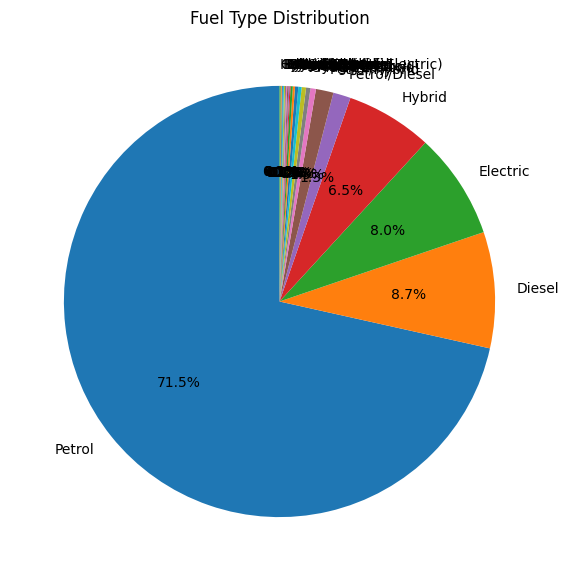

In [21]:
plt.figure(figsize=(7,7))
df['Fuel Types'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Fuel Type Distribution")
plt.ylabel("")
plt.show()

In [22]:
df.to_csv("cleaned_car_dataset.csv", index=False)

In [25]:

# STEP 2: Load cleaned dataset
df = pd.read_csv("cleaned_car_dataset.csv")

# STEP 3: Select features (X) and target (y)
X = df[['HorsePower', 'Total Speed', 'Torque', 'Seats', 'Fuel Types']]
y = df['Cars Prices']

# STEP 4: Encode categorical (Fuel Types)
X = X.copy()
X['Fuel Types'] = LabelEncoder().fit_transform(X['Fuel Types'].astype(str))

# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Train models
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# STEP 7: Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# STEP 8: Evaluation
print("🔹 Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score (Accuracy):", r2_score(y_test, y_pred_lr))

print("\n🔹 Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score (Accuracy):", r2_score(y_test, y_pred_rf))

🔹 Linear Regression Performance:
MAE: 230017.78080660704
RMSE: 288531.72004686977
R² Score (Accuracy): -0.5914508447004119

🔹 Random Forest Performance:
MAE: 47935.38625291773
RMSE: 305577.78885549644
R² Score (Accuracy): -0.7850470499139546


/tmp/ipython-input-918410684.py:3: RuntimeWarning: invalid value encountered in log1p
  plt.scatter(np.log1p(y_test), np.log1p(y_pred_lr), alpha=0.6, color="red", label="Linear Regression")


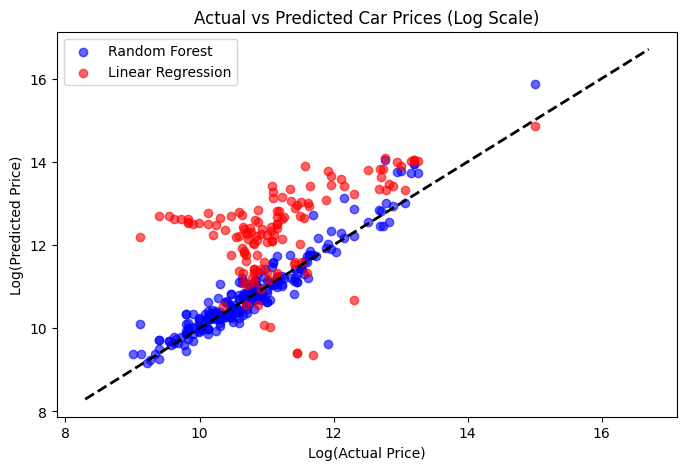

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(np.log1p(y_test), np.log1p(y_pred_rf), alpha=0.6, color="blue", label="Random Forest")
plt.scatter(np.log1p(y_test), np.log1p(y_pred_lr), alpha=0.6, color="red", label="Linear Regression")
plt.plot([np.log1p(y.min()), np.log1p(y.max())],
         [np.log1p(y.min()), np.log1p(y.max())], 'k--', lw=2)
plt.xlabel("Log(Actual Price)")
plt.ylabel("Log(Predicted Price)")
plt.title("Actual vs Predicted Car Prices (Log Scale)")
plt.legend()
plt.show()

